# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [1]:
import networkx as nx
import nxviz
import community.community_louvain as cl
import pandas as pd
import matplotlib.pyplot as plt

## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [2]:
basketball = pd.read_csv('../data/us_mens_basketball.csv')

In [3]:
basketball.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
5,4505,Carmelo Kyan Anthony,M,24.0,203.0,109.0,United States,USA,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,Gold
6,4505,Carmelo Kyan Anthony,M,28.0,203.0,109.0,United States,USA,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,Gold
7,4505,Carmelo Kyan Anthony,M,32.0,203.0,109.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
8,5173,"Michel Taylor ""Tate"" Armstrong",M,20.0,190.0,77.0,United States,USA,1976 Summer,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Gold
9,5212,Jay Joseph Hoyland Arnette,M,21.0,188.0,79.0,United States,USA,1960 Summer,1960,Summer,Roma,Basketball,Basketball Men's Basketball,Gold


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [4]:
def df_to_graph(df, entity, edge):
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]
    
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

In [5]:
df_to_graph(basketball, 'Name', 'Games').sort_values(by='Games', ascending=False).head(10)

,Name_x,Name_y,Games
1557,LeBron Raymone James,Carmelo Kyan Anthony,3
282,Carmelo Kyan Anthony,LeBron Raymone James,3
1347,Karl Malone,Charles Wade Barkley,2
1487,Kobe Bean Bryant,LeBron Raymone James,2
429,"Christopher Paul ""Chris"" Mullin",Michael Jeffrey Jordan,2
617,Deron Michael Williams,Kobe Bean Bryant,2
618,Deron Michael Williams,LeBron Raymone James,2
1206,John Houston Stockton,Charles Wade Barkley,2
244,"Carlos Austin Boozer, Jr.","Dwyane Tyrone Wade, Jr.",2
1744,"Mitchell James ""Mitch"" Richmond, III",David Maurice Robinson,2


In [6]:
G = df_to_graph(basketball, 'Name', 'Games')

## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

In [7]:
H = nx.from_pandas_edgelist(G, 'Name_x', 'Name_y')

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

/Users/admin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


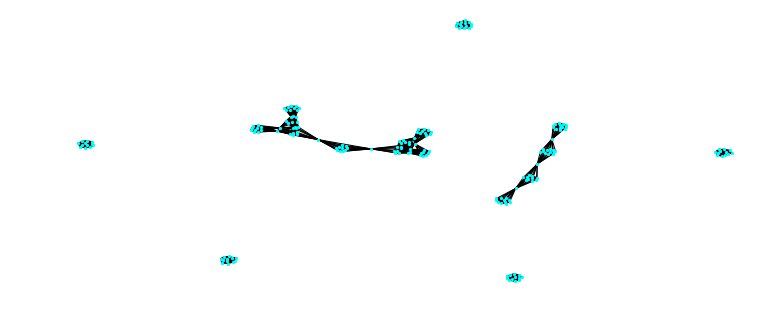

In [8]:
plt.figure(figsize=(10,4))
nx.draw(H, node_size=5, node_color='cyan')

In [9]:
#order (number of nodes) 

H.order()
H.number_of_nodes()

196

In [10]:
# and size (number of edges)

H.size()
H.number_of_edges()

1232

In [11]:
# average degree

sum(dict(H.degree()).values())/H.order()


12.571428571428571

In [12]:
# average density

nx.density(H)

0.06446886446886448

## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [13]:
betweenness = nx.betweenness_centrality(H, weight='edge')
sorted(betweenness.items(), key=lambda kv: kv[1], reverse=True)[:5]

[('Gary Dwayne Payton', 0.09193761564895586),
 ('Jason Frederick Kidd', 0.09135606661379858),
 ('Carmelo Kyan Anthony', 0.04742268041237115),
 ('David Maurice Robinson', 0.03266190853819722),
 ('William Marion "Bill" Hougland', 0.030240549828178694)]

## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

In [14]:
eigenvector = nx.eigenvector_centrality_numpy(H)
sorted(eigenvector.items(), key=lambda kv: kv[1], reverse=True)[:5]

[('Carmelo Kyan Anthony', 0.34185005667190665),
 ('LeBron Raymone James', 0.2884535214315885),
 ('Christopher Emmanuel "Chris" Paul', 0.22431681558531236),
 ('Deron Michael Williams', 0.2243168155853123),
 ('Kobe Bean Bryant', 0.2243168155853123)]

## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [15]:
degree = nx.degree_centrality(H)
sorted(degree.items(), key=lambda kv: kv[1], reverse=True)[:5]

[('Carmelo Kyan Anthony', 0.18461538461538463),
 ('David Maurice Robinson', 0.14358974358974358),
 ('Robert Albert "Bob" Kurland', 0.13333333333333333),
 ('LeBron Raymone James', 0.13333333333333333),
 ('William Marion "Bill" Hougland', 0.12307692307692308)]

## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

/Users/admin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


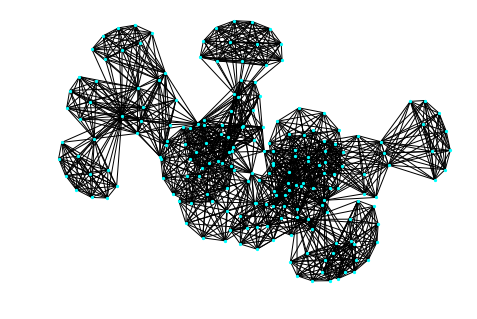

In [16]:
nx.draw_kamada_kawai(H, node_size=5, node_color='cyan')


## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

/Users/admin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


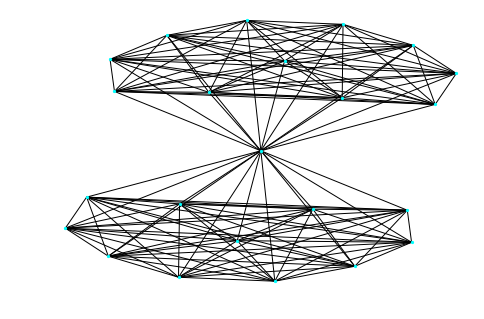

In [17]:
ego = nx.ego_graph(H, 'Gary Dwayne Payton', radius=1)
nx.draw_kamada_kawai(ego, node_size=5, node_color='cyan')


## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

In [19]:
parts = cl.best_partition(H)
parts

{'Adrian Delano Dantley': 0,
 'Ernest "Ernie" Grunfeld': 0,
 'Kenneth Alan "Kenny" Carr': 0,
 'Michel Taylor "Tate" Armstrong': 0,
 'Mitchell William "Mitch" Kupchak': 0,
 'Philip Jackson "Phil" Ford, Jr.': 0,
 'Phillip Gregory "Phil" Hubbard': 0,
 'Scott Glenn May': 0,
 'Steven Bernard "Steve" Sheppard': 0,
 'Thomas Joseph "Tom" LaGarde': 0,
 'Walter Paul Davis': 0,
 'William Quinn Buckner': 0,
 'Adrian Howard Smith': 1,
 'Burdette Eliele "Burdie" Haldorson': 1,
 'Darrall Tucker Imhoff': 1,
 'Earl Allen Kelley': 1,
 'Jay Joseph Hoyland Arnette': 1,
 'Jerome Alan "Jerry" West': 1,
 'Jerry Ray Lucas': 1,
 'Lester Everett "Les" Lane': 1,
 'Oscar Palmer Robertson': 1,
 'Robert Lewis "Bob" Boozer': 1,
 'Terence Gilbert "Terry" Dischinger': 1,
 'Walter Jones "Walt" Bellamy, Jr.': 1,
 'Alexander John "Alex" Groza': 2,
 'Clifford Eugene "Cliff" Barker': 2,
 'Donald Argee "Don" Barksdale': 2,
 'Gordon C. Carpenter': 2,
 'Jesse Banard Renick': 2,
 'Kenneth Herman "Kenny" Rollins': 2,
 'Lewis Wi

/Users/admin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


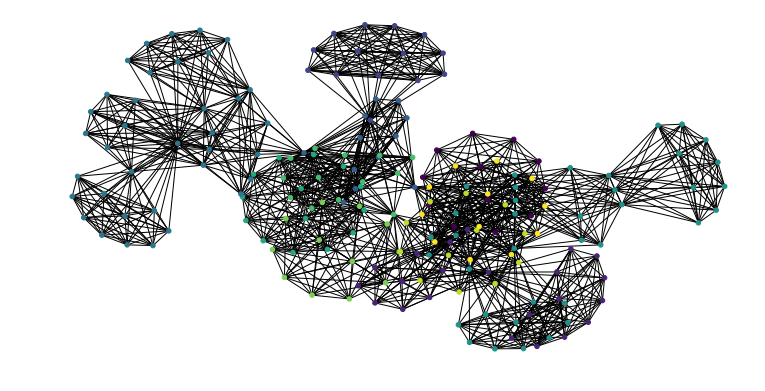

In [32]:
plt.figure(figsize=(10,5))
values = list(parts.values())
nx.draw_kamada_kawai(H, node_size=20, node_color=values)

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

In [20]:
J = df_to_graph(basketball, 'Games', 'Name')
I = nx.from_pandas_edgelist(J, 'Games_x', 'Games_y')

In [21]:
I.number_of_nodes()
#I.order()

13

In [22]:
I.size()
#I.number_of_edges()

15

In [23]:
# average degree

sum(dict(I.degree()).values())/I.order()

2.3076923076923075

In [24]:
# average density

nx.density(H)

0.06446886446886448

In [25]:
betweenness = nx.betweenness_centrality(I, weight='edge')
sorted(betweenness.items(), key=lambda kv: kv[1], reverse=True)[:5]

[('2000 Summer', 0.24242424242424243),
 ('1996 Summer', 0.2272727272727273),
 ('2008 Summer', 0.2272727272727273),
 ('1992 Summer', 0.10606060606060606),
 ('1952 Summer', 0.030303030303030304)]

/Users/admin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


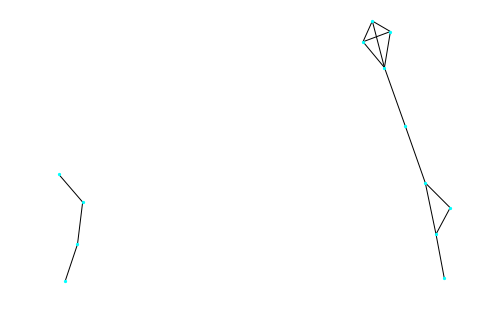

In [28]:
nx.draw(I, node_size=5, node_color='cyan')

### Generate a network visualization of this graph using the layout of your choice.

/Users/admin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


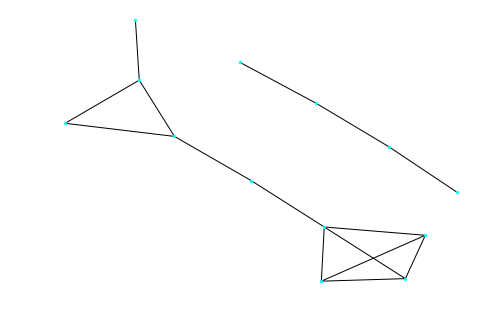

In [27]:
nx.draw_kamada_kawai(I, node_size=5, node_color='cyan')
